## Part I - Prosper Loan Dataset Exploration and Visualization 
##### by Eliud Njoki


## Investigation Overview


- The goal of this Exoploration is to understand how the Loan Term is infleuced by other factors or attributes about the loan adn teh client. The Focus is therefore on the 'Term' variable adn how it compares ot other variables such as 'BorrowerAPR', 'BorrowerRate', and occupation.
- Expoloration as shown in the charts shows that the borrower rate increases with the term of the loan.
- There is alos a positive correlation between Term, estiamted return and the most common term for the loans offered is 36 months.




## Dataset Overview
- This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.


In [22]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [23]:
# load in the dataset into a pandas dataframe
loan_df = pd.read_csv('../data/prosperLoanData.csv')
# copy of the dataset
ploans = loan_df.copy()

# use a function to fill missing numeric bvalues with mean
cols = ['EstimatedEffectiveYield', 'BorrowerAPR', 'ProsperRating (numeric)', 'EmploymentStatusDuration', 'ProsperScore', 'EstimatedLoss', 'EstimatedReturn']
for c in cols:
    ploans[c].fillna(ploans[c].mean(), inplace = True)

ploans.drop_duplicates(inplace=True)
ploans.head(10)

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
5  0F05359734824199381F61D        1074836  2013-12-14 08:26:37.093000000   
6  0F0A3576754255009D63151         750899  2013-04-12 09:52:56.147000000   
7  0F1035772717087366F9EA7         768193  2013-05-05 06:49:27.493000000   
8  0F043596202561788EA13D5        1023355  2013-12-02 10:43:39.117000000   
9  0F043596202561788EA13D5        1023355  2013-12-02 10:43:39.117000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   
5         NaN    60    Current                  NaN      0.15425   
6         NaN    36    Current                  NaN      0.31032   
7         NaN    36    Current                  NaN      0.23939   
8         NaN    36    Current                  NaN      0.07620   
9         NaN    36    Current                  NaN      0.07620   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380  ...         -133.18                0.0   
1        0.0920       0.0820  ...            0.00                0.0   
2        0.2750       0.2400  ...          -24.20                0.0   
3        0.0974       0.0874  ...         -108.01                0.0   
4        0.2085       0.1985  ...          -60.27                0.0   
5        0.1314       0.1214  ...          -25.33                0.0   
6        0.2712       0.2612  ...          -22.95                0.0   
7        0.2019       0.1919  ...          -69.21                0.0   
8        0.0629       0.0529  ...          -16.77                0.0   
9        0.0629       0.0529  ...          -16.77                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  \
0                    0.0                  0.0                             0.0   
1                    0.0                  0.0                             0.0   
2                    0.0                  0.0                             0.0   
3                    0.0                  0.0                             0.0   
4                    0.0                  0.0                             0.0   
5                    0.0                  0.0                             0.0   
6                    0.0                  0.0                             0.0   
7                    0.0                  0.0                             0.0   
8                    0.0                  0.0                             0.0   
9                    0.0                  0.0                             0.0   

   PercentFunded  Recommendations InvestmentFromFriendsCount  \
0            1.0                0                          0   
1            1.0                0                          0   
2            1.0                0                          0   
3            1.0                0                          0   
4            1.0                0                          0   
5            1.0                0                          0   
6            1.0                0                          0   
7            1.0                0                          0   
8            1.0                0                          0   
9            1.0                0                          0   

  InvestmentFromFriendsAmount Investors 

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1) - Loan Term popularity

- The most common loan term is 36 months followed by 60 months. A 12 month repayment time is hte least popular among the loans offered to the cleints by the bank.
- The 36 month loan term is so popular that it more than doubles the number of loans taken under the 60 month term.


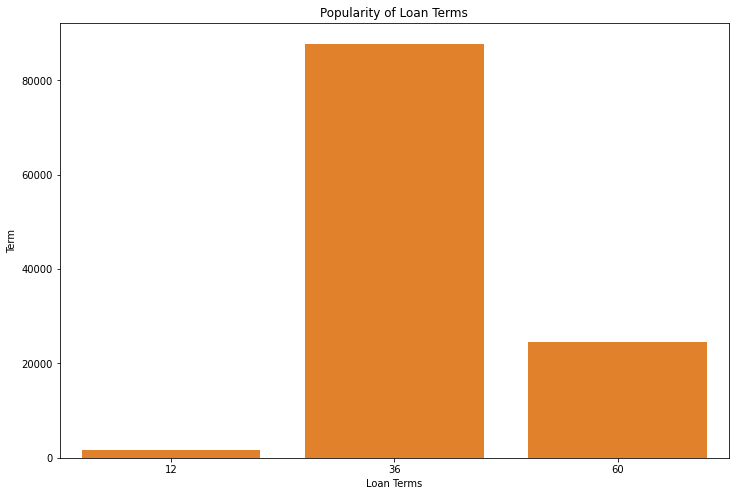

In [24]:
plt.figure(figsize=(12, 8))
loan_terms = ploans.Term.value_counts()
base_color = sb.color_palette()[1]
plt.xlabel('Loan Terms')
plt.ylabel('Number of Loans')
plt.title('Popularity of Loan Terms')
sb.barplot(loan_terms.index, loan_terms, color = base_color);

## (Visualization 2) - Loan Term and How it compares to Borrower APR

- Loans with long term payment have a low Annual Percentage Rate offered ot the buyer. This is seen in the chart below where the loans with terms of 36 and 60 months have a lower APR compared ot those of 12 months. The 36 Month long term has outliers which can be analysed further for indepth udnerstanding fo the reason.

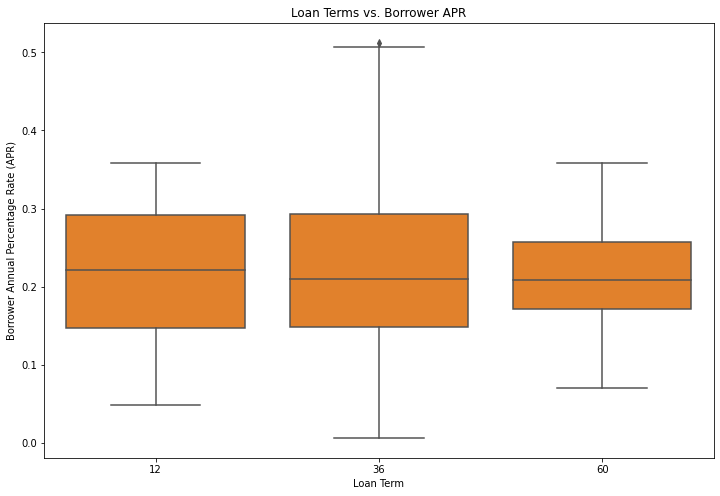

In [25]:
plt.figure(figsize=(12,8))
ax = sb.boxplot(data = ploans, x = 'Term', y = 'BorrowerAPR', color = base_color);
ax.set_xlabel('Loan Term')
ax.set_ylabel('Borrower Annual Percentage Rate (APR)')
ax.set_title("Loan Terms vs. Borrower APR")
plt.show()

## (Visualization 3) - Comparing Loan terms and how it relates ot Borrower rates for differnt employment statuses.



- Clients with 'Not employed' status have the highest borrowerRates and a moderate Loan term of 36 months.
- Employed individuals have a lower BorrowerRate with higher/longer loan terms of upto 60 months.

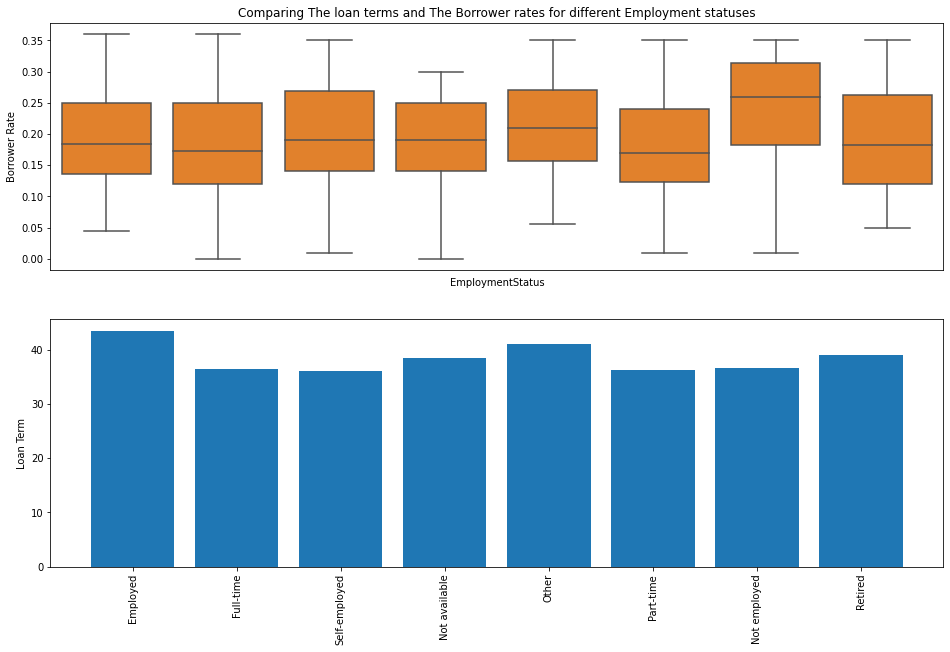

In [26]:

plt.figure(figsize = [16,10])


# plot APR vs employment status
plt.subplot(2,1,1)
sb.boxplot(data = ploans, x = 'EmploymentStatus', y = 'BorrowerRate',color = base_color, 
           order = ploans['EmploymentStatus'].value_counts().index)
plt.xticks([])
plt.ylabel('Borrower Rate')
plt.title('Comparing The loan terms and The Borrower rates for different Employment statuses')

# plot average ProsperRating in each employment status
plt.subplot(2,1,2)
plt.bar(x = ploans['EmploymentStatus'].value_counts().index, 
        height = ploans.groupby('EmploymentStatus').mean()['Term'])
plt.xticks(rotation = 90)
plt.ylabel('Loan Term')
plt.show;

In [27]:
!jupyter nbconvert --to slides --no-input Part_II_slide_deck.ipynb

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 642044 bytes to Part_II_slide_deck.slides.html


THANK YOU!!!